In [ ]:
##################################################
# Lab 1: Fundamentals, Recursion, and Complexity #
##################################################

###
# Setup
###

# Enrollment link: http://rosalind.info/classes/enroll/083764b484/
# Course link: http://rosalind.info/classes/704/ (was 581 last year)

# BMI2005/
# labs/
#     lab1/
#         lab1.ipynb
#     rosalind/
#         rosalind_dna.txt
#         rosalind_gc.txt

# David Marr's 3 levels of organization (Neuroscientist, 1976)
#   / 1. Computuational \
#  / 2. Algorithmic      \
# / 3. Implementational   \

# Style guides - PEP 8: https://www.python.org/dev/peps/pep-0008/
# Stack overflow :)


In [1]:
'''
Problem 1. Counting Nucleotides (Rosalind)
Background: A string is simply an ordered collection of symbols selected 
from some alphabet and formed into a word; the length of a string is the 
number of symbols that it contains. An example of a length 21 DNA string 
(whose alphabet contains the symbols 'A', 'C', 'G', and 'T') is 
"ATGCTTCAGAAAGGTCTTACG."

Given: A DNA string ss of length at most 1000 nt.

Return: Four integers (separated by spaces) counting the respective number 
of times that the symbols 'A', 'C', 'G', and 'T' occur in ss.

Problem: Write a function compute_acgt() that takes in a string ss and returns 
a series of integers as specified above.

# Sample Dataset
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC

# Sample Output
20 12 17 21
'''
# helper function for parsing input
path_to_file = '/Users/KevinBu/Desktop/BMI2005_Algorithms_2020/Labs/rosalind/rosalind_dna.txt'
with open(path_to_file, 'r') as f:
    ss = f.readline()

# parse file
# create counters for each char
# iterate over string (for char in string)
# count each char (increment counter)
# return sequence of integers
    
# write a function compute_acgt(ss) that returns the desired output above
def compute_acgt(ss):
    N_a, N_c, N_g, N_t = 0, 0, 0, 0
    for s in ss:
        if s == 'A':
            N_a += 1
        elif s == 'C':
            N_c += 1
        elif s == 'G':
            N_g += 1
        elif s == 'T':
            N_t += 1

    return str(N_a) + ' ' + str(N_c) + ' ' + str(N_g) + ' ' + str(N_t)

# using the built in list operator .count() in python is better
def compute_acgt(ss):
    return str(ss.count('A')) + ' ' + str(ss.count('C')) + ' ' + str(ss.count('G')) + ' ' + str(ss.count('T'))

print(compute_acgt(ss))

198 216 191 201


In [2]:
'''
Problem 2. Implementation of Fibonacci Recursive

Given: An integer n.

Return: The n-th fibonacci number.

Problem: Write a function recursive_fibonacci(n) that takes an integer n and 
returns the n-th fibonacci number using recursive calls. Compute the 10th 
fibonacci number. 

Here is the pseudocode (from Lecture 1) to help :)

RECURSIVEFIBONACCI(n)
1 if n = 1 or n = 2
2   return 1
3 else
4   a ← RECURSIVEFIBONACCI(n - 1)
5   b ← RECURSIVEFIBONACCI(n - 2)
6   return a + b

'''

def recursive_fibonacci(n):
    if n == 1 or n == 2:
        return 1
    else:
        a = recursive_fibonacci(n-1)
        b = recursive_fibonacci(n-2)
    return a + b

recursive_fibonacci(10)


55

In [3]:
'''
Problem 3. Implementation of Fibonacci Iterative (Rosalind)
Background: The Fibonacci numbers 0,1,1,2,3,5,8,13,21,34,… are 
generated by the following simple rule Fn = F_{n−1} + F_{n−2} 
if n > 1, 1 if n = 1 and 0 if n = 0

Given: A positive integer n ≤ 25.

Return: The value of Fn.

Problem: Write a function fibonacci(n) that takes an integer n and 
returns the n-th fibonacci number using iterative calls. 

Here is the pseudocode again (from Lecture 1) to help :)

FIBONACCI(n)
1 F1 ← 1
2 F2 ← 1
3 for i ← 3 to n
4   Fi ← Fi-1 + Fi-2
5 return Fn
'''

import numpy as np

path_to_file = '/Users/KevinBu/Desktop/BMI2005_Algorithms_2020/Labs/rosalind/rosalind_fibo.txt'
with open(path_to_file, 'r') as f:
    n = int(f.readline())

# parse file
# initialize array of fibonacci numbers
# for each entry in array after 0 and 1 (2 onwards)
# compute i-th entry based on entry of i-1 and i-2 
# return result of last entry (note that array of length n has index of last entry n-1)    
    
def fibonacci(n):
    f = np.ones(n)
    for i in range(2,n):
        f[i] = f[i-1] + f[i-2]
    return int(f[n-1])

fibonacci(n)

46368

In [4]:
'''
Problem 4. Implementation of General Purpose Single-Array Integer-Based 
Doubling Experiment for Fibonacci andAny Other Single-Array Integer Function
Background: A quick in silico experiment one can conduct to test the 
complexity scaling of a particular function such as fibonacci (which we 
call a 'Single-Array Integer-Based function') is to build a general purpose 
'wrapper' function that takes in that particular function and a desired maximum 
array size and iterate over array sizes that double (simulating problem 
complexity) and record how the runtime changes as a function of input size.
'Fun' reading: https://www.nayuki.io/page/fast-fibonacci-algorithms

Given: A desired starting array size (e.g. n = 2), a maximum bound (n_max) and a 
function func (e.g. fibonacci(n))

Return: A matrix/nested list/2D np array/dict where each row is an 'observation' 
i.e. the first entry is the problem size and the second entry is the runtime.

Problem:
(a) Write a function time_trial(n, func) that takes in a particular problem size 
and function func and returns the time it took for that problem to run. The 
library 'time' and function time.process_time() may be useful here.

(b) Write a function doubling_test(n, n_max, func) that takes in n, n_max and 
func using the helper function above to return a list of tuples [[2, 100],[4, 400],
[8, 1600],...] where the first entry of each nested tuple is the size of the array 
and the second entry is the run time. 

(c) Plot your results on linear and log-log plots.


'''
import time

# 4a) time_trial() has two arguments
# 1. func() - takes an integer performs a calculation on an array generated from that 
# integer
# ex. func() could be fibonacci(n) which generates the fibonacci sequence and returns 
# the n-th fibonacci number
# 2. n - integer value of the problem size, here the argument for func() above
# returns the time it takes to generate and solve 

def time_trial(n, func):
    start = time.process_time()
    output = func(n)
    fin = time.process_time()
    return fin - start 

# 4b) doubling_test() has three arguments
# 1. n - integer for problem size (starting, e.g. n = 2)
# 2. n_max - the largest value for problem size (ending, e.g. n_max = 128)
# returns a data matrix of value pairs; the problem size and corresponding run time

def doubling_test(n, n_max, func):
    data = []
    while n < n_max: # n = 2, 4, 8, ... 
        current = time_trial(n, func)
        print(n, current)
        # [2, 1e-05], [4, 2e-05], [8, 4e-05] etc.
        data.append([n, current])
        n *= 2
    return np.array(data)

print('The doubling test for recursive fibonacci')
recursive_data = doubling_test(2, 50, recursive_fibonacci)

print('The doubling experiment for faster fibonacci')
interative_data = doubling_test(2, 2000, fibonacci)


The doubling test for recursive fibonacci
2 3.999999999892978e-06
4 8.000000000008e-06
8 1.8000000000073513e-05
16 0.0009360000000000479
32 1.148912
The doubling experiment for faster fibonacci
2 5.199999999971894e-05
4 2.4000000000246047e-05
8 2.6000000000081513e-05
16 2.799999999991698e-05
32 4.8000000000048004e-05
64 7.00000000000145e-05
128 0.00011999999999989797
256 0.00022799999999989495
512 0.00048000000000003595
1024 0.000952000000000286


(-15, 10)

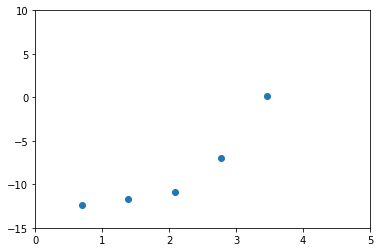

In [6]:
'''
4c) Study of Fibonacci Complexity Scaling, Plotting Results Linear and 
Log-Log in Matplotlib
Here we plot the runtimes for the recursive data on linear and log-log plot scales.
'''
%matplotlib inline
import matplotlib.pyplot as plt

n_data = recursive_data[:,0]
time_data = recursive_data[:,1]

plt.figure(figsize=(6, 4))
#plt.scatter(n_data, time_data)
#plt.xlim(0, 40)
#plt.ylim(-0.1, 2)

plt.scatter(np.log(n_data), np.log(time_data))
plt.xlim(0, 5)
plt.ylim(-15, 10)

The doubling time for two sum naive
2 0.0003059999999996954
4 0.00025999999999992696
8 0.00030800000000041905
16 0.000500000000000167
32 0.0012419999999999654
64 0.004658000000000051
128 0.014429999999999943
256 0.04158600000000012
512 0.14638399999999985
1024 0.574916
2048 2.2898380000000005


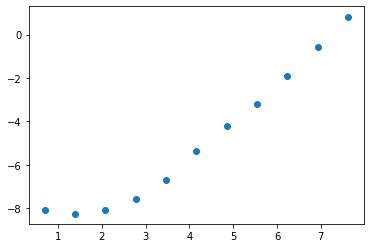

In [7]:
'''
Problem 5. Two-sum and improvements
Background: Recall the in class implementation of two-sum naive that seems intuitively 
inefficient and can be shown to run in O(n^2) (why?). In the next problem, we will 
construct a faster version.
'''
# set seed
np.random.seed(0)

# visualize on 2D array
def two_sum_naive(n):
    # lst = [1, -31, 26, 83, ... ] length n 
    lst = np.random.randint(low = -100, high = 100 + 1, size = n)
    count = 0
    for i in range(len(lst)):            # i = 0, lst[i] = 1
        for j in range(i + 1, len(lst)): # i = 0, j = 1 -> lst[i] = 1, lst[j] = -31
            if (lst[i] + lst[j] == 0):   # i = 0, j = 2 -> lst[i] = 1, lst[j] = 26 ... etc.
                count += 1
    return count

print('The doubling time for two sum naive')
naive_data = doubling_test(2, 4000, two_sum_naive)

n_data = naive_data[:,0]
time_data = naive_data[:,1]

%matplotlib inline
plt.figure(figsize=(6, 4))
#plt.scatter(n_data, time_data)
plt.scatter(np.log(n_data), np.log(time_data))

The doubling time for two sum improved
2 0.0002940000000002385
4 0.000268000000000157
8 0.00030800000000041905
16 0.00027600000000038705
32 0.000268000000000157
64 0.00078400000000034
128 0.0017100000000001003
256 0.0027800000000004488
512 0.00589200000000023
1024 0.012291999999999526
2048 0.021253999999999884


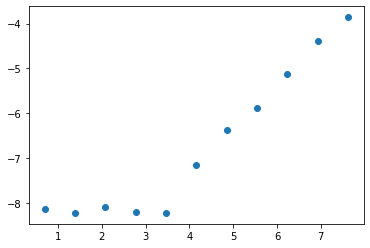

In [10]:
'''
Problem 5. Two-sum and improvements (continued)
Given: an array size n

Return: a function two_sum_improved(n) that builds a random array of integers;
here we use np.random.randint(low = -100, high = 100 + 1, size = n) 
- and returns the number of pairs that sum to 0 (excluding duplicates).

Problem:
(a) Construct a list lst of random integers from -100 to 100 of size n and sort them.
(b) Using the provided binarySearch function (that takes in a list and a particular 
item of interest for which we are searching), construct a function two_sum_improved(n) 
that takes in a list and uses the lines from (a) to return the number of pairs that sum to 0. 

'''
# binarySearch - take for granted now that this runs in O(log(n)) 
# example: binarySearch([1,2,4], 2) returns True
# where alist = [1,2,4] and item = 2

def binarySearch(alist, item):
    first = 0
    last = len(alist) - 1
    found = False
    while first <= last and not found:
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint - 1
            else:
                first = midpoint + 1
    return found

# TODO
# generate random list of integers size n
# sort list
# initialize counter 
# for each entry in list
## check if inverse entry exists via search
## increment count if it does
# divide by 2 to avoid double-counting

def two_sum_improved(n):
    lst = np.random.randint(low = -100, high = 100 + 1, size = n)
    lst.sort() # in place, ascending order, O(n log n) (Timsort, merge sort)
    count = 0
    # fill in here
    for i in range(len(lst)):
        if binarySearch(lst, -lst[i]):
            count += 1
    return count // 2

print('The doubling time for two sum improved')
improved_data = doubling_test(2, 4000, two_sum_improved)

n_data = improved_data[:,0]
time_data = improved_data[:,1]

plt.figure(figsize=(6, 4))
# plt.scatter(n_data, time_data)
plt.scatter(np.log(n_data), np.log(time_data))

In [ ]:
'''
Problem 6.
Provide the big-O times for the following code blocks.
The following formula may be useful: n + nr + nr^2 + nr^3 + ... = n / (1 - r)

a. O(nlogn)
def problem_a(n):
    sum = 0 
    i = n
    while i > 0:
        for j in range(n):
            sum += 1        
        i = i // 2
    return sum 

b. O(2n) ~ O(n)
def problem_b(n):
    sum = 0
    k = n
    while k > 0:
        for i in range(k):
            sum += 1
        k = k // 2
    return sum
    
c. n (log n) ^2
def problem_c(n):
    sum = 0
    i = n/2
    while i < n:
        j = 1
        while j < n:
            k = 1
            while k < n:
                sum += 1
                k = k * 2
            j = j * 2    
        i += 1
    return sum 
'''

In [ ]:
'''
Problem 7.
Give tilde approximations for the following quantities:
a. 2n + 3 ~ 2n
b. 2log(n) + n + 3n^3 + 3 ~ 3n^3
c. 1/n + log(n) ~ log(n)
d. n^4 / n^3 ~ n
e. n^2 + 2^n ~ 2^n
'''

(5, 0.895630306308691)


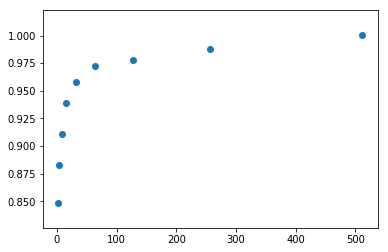

In [1]:
'''
Problem 8. Write a function birthday(n) that takes an integer n and uses 
np.random.randint(low = 0, high = n) to generate a random sequence of integers 
between 0 and n-1. Run experiments to validate the hypothesis that the number 
of integers generated before the first repeated value is found is ~ sqrt ( pi * n / 2).

a. Write a command that generates a random number between 0 and n - 1.

b. Write a function birthday(n) that returns the number of values generated until a value is 
repeated as a function of the range of possible values n.

c. Write a function birthday_sim(n) that repeats birthday(n) a total of n_sim = 10000 times.

d. Show that as n increases (e.g. with a doubling experiment), from n = 2 to n = 1000,
the value of birthday_sim(n) approaches sqrt(pi * n / 2).
'''

import numpy as np

def birthday(n):
    past_trials = []
    new_trial = np.random.randint(low=0, high=n)
    k = 0
    while new_trial not in past_trials:
        past_trials.append(new_trial)
        new_trial = np.random.randint(low=0, high=n)
        k += 1
    return k

def birthday_sim(n):
    data = []
    for i in range(10000):
        data.append(birthday(n))
    return (n, np.mean(data) / np.sqrt(np.pi * n/2))

print(birthday_sim(5))

data = []
n = 2
n_max = 1000
while n < n_max:
    data.append(birthday_sim(n))
    n = n * 2
data = np.array(data)
    
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(data[:,0], data[:,1])
     